# 图像特效-Neon滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/f4.jpg')
gray = cv2.imread('../datas/f4.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [20]:
def neon_filter(src,outlineCase=1):
    lut_r = np.arange(0,256).astype(np.uint8)
    lut_g = np.arange(0,256).astype(np.uint8)
    lut_b = np.arange(0,256).astype(np.uint8)
    if outlineCase == 1:
        lut_r = 255 - lut_r
    elif outlineCase == 2:
        lut_g = 255 - lut_g
    elif outlineCase == 3:
        lut_b = 255 - lut_b
    luminance = np.zeros((src.shape[0],src.shape[1]),dtype=np.float32)
    srcf = np.float32(src)
    luminance = 0.299 * srcf[:,:,0] + 0.58 * srcf[:,:,1] + 0.11 * srcf[:,:,2]
    dst = np.zeros_like(srcf)
    rows,cols = src.shape[0],src.shape[1]
    for x in range(1,rows-1):
        for y in range(1,cols-1):
            grayX = -luminance[x-1,y-1] + luminance[x-1,y-1+2] - 2* luminance[x-1+1,y-1] + 2* luminance[x-1+1,y-1+2] - luminance[x-1+2,y-1]+ luminance[x-1+2,y-1+2]
            grayY = luminance[x-1,y-1] + 2* luminance[x-1,y-1+1] + luminance[x-1,y-1+2] - luminance[x-1+2,y-1] - 2* luminance[x-1+2,y-1+1] - luminance[x-1+2,y-1+2]
            magnitude = int(255 - np.clip(np.abs(grayX) + np.abs(grayY),0,255))
            dst[x,y,0] = lut_r[magnitude]
            dst[x,y,1] = lut_g[magnitude]
            dst[x,y,2] = lut_b[magnitude]
    dst = np.clip(dst,0,255)
    return np.uint8(dst)

In [21]:
dst = neon_filter(rgb)

Text(0.5,1,'Neon Filter')

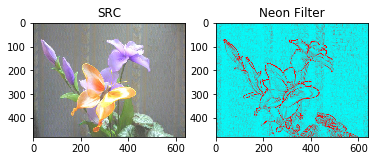

In [22]:
plt.subplot(121)
plt.imshow(rgb)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Neon Filter')